In [1]:
## from ROOT import TLorentzVector
from ROOT import Math
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Welcome to JupyROOT 6.22/06


In [2]:
def thetaPhi():
    '''returns random theta and phi values'''
    theta = np.random.uniform(0,2*np.pi)
    phi = np.random.uniform(0,np.pi)
    return theta, phi

def momenta(mag, theta, phi):
    '''given an input magnitude, theta and phi the cartesian momenta are returned'''
    Px = mag * np.sin(theta) * np.cos(phi) 
    Py = mag * np.sin(theta) * np.sin(phi)
    Pz = mag * np.cos(theta)
    
    return Px, Py, Pz
    

def wArr(num):
    '''just for making numpy array of stationary w given the number of events'''
    momenta = np.zeros([num,4])
    momenta[:,3] = wMass
    
    return momenta

def vecToArr(vec):
    '''converts lorentzvector to array of components'''
    arr = np.zeros([4])
    arr[0] = vec.Px()
    arr[1] = vec.Py()
    arr[2] = vec.Pz()
    arr[3] = vec.E()
    
    return arr

In [3]:
def boostedW():
    '''produces numpy array of 4 momenta of w decay into electron and neutrino under a normally 
    distributed boost in z direction'''
    # defining constants
    event = np.zeros([3,4])
    wMass = 80.3
    eE = wMass / 2
    
    # making particles in w rest frame
    thetae, phie = thetaPhi()
    Px, Py, Pz = momenta(eE, thetae, phie)
    w = Math.LorentzVector('ROOT::Math::PxPyPzE4D<double>')(0,0,0, wMass)
    e = Math.LorentzVector('ROOT::Math::PxPyPzE4D<double>')(Px, Py, Pz, eE)
    n = Math.LorentzVector('ROOT::Math::PxPyPzE4D<double>')(-Px, -Py, -Pz, eE)
    
    # applying boost to all particles
    beta = np.random.normal(0,0.1) # beta (v/c) is noramlly distributed centred on 0 with width 0.1
    boostedW = Math.VectorUtil.boostZ(w, beta)
    wArr = vecToArr(boostedW)
    
    boostedE = Math.VectorUtil.boostZ(e, beta)
    eArr = vecToArr(boostedE)
    
    boostedN = Math.VectorUtil.boostZ(n, beta)
    nArr = vecToArr(boostedN)
    
    event[0] = wArr
    event[1] = eArr
    event[2] = nArr
    
    return event, beta

num = 10000
events = np.zeros([num, 3, 4])
beta = np.zeros([num])
#beta = 0.1

for i in range(num):
    events[i], beta[i] = boostedW()
    

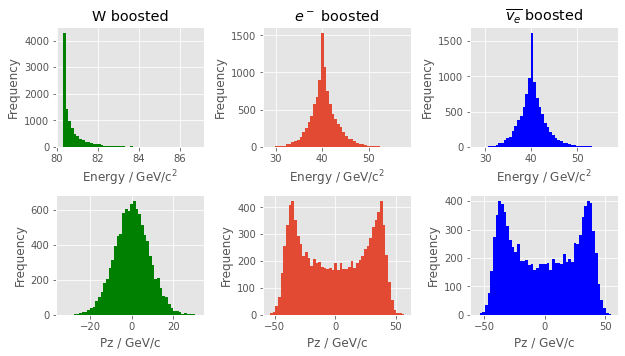

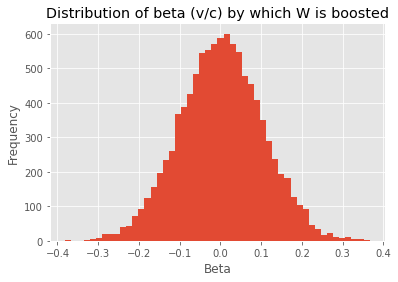

In [4]:
fig, ax = plt.subplots(2,3)
plt.subplots_adjust(left=0.0,bottom=0, right=1.3, top=1, wspace=0.4, hspace=0.4)

ax[0,0].hist(events[:,0,3], 50, color = 'g');
ax[0,1].hist(events[:,1,3], 50);
ax[0,2].hist(events[:,2,3], 50,color ='b');

ax[1,0].hist(events[:,0,2], 50,color = 'g');
ax[1,1].hist(events[:,1,2], 50);
ax[1,2].hist(events[:,2,2], 50,color ='b');

plt.setp(ax[0,:], xlabel='Energy / GeV/c$^2$')
plt.setp(ax[1,:], xlabel='Pz / GeV/c')
plt.setp(ax[:], ylabel='Frequency')


ax[0,0].title.set_text('W boosted')

ax[0,1].title.set_text('$e^-$ boosted')

ax[0,2].title.set_text('$ \overline{v_e} $ boosted')

plt.figure()
plt.title('Distribution of beta (v/c) by which W is boosted')
plt.xlabel('Beta')
plt.ylabel('Frequency')
plt.hist(beta, 50);

In [19]:
def backToBack():
    ''' produces numpy array of 4 momenta of
    w pair with one hadronic decay and one leptonic decay'''
    event = np.zeros([6,4])
    # making back to back w bosons (stationary)
    wMass = 80.3
    
    wmag = 10 # magnitude of w momentum
    
    theta, phi = thetaPhi()
    Px, Py, Pz = momenta(wmag, theta, phi)

    w1 = Math.LorentzVector('ROOT::Math::PxPyPzE4D<double>')(Px, Py, Pz, wMass)
    w2 = Math.LorentzVector('ROOT::Math::PxPyPzE4D<double>')(-Px, -Py, -Pz, wMass)

    #boosting the Ws
    beta = np.random.normal(0,0.1)
    boostedW1 = Math.VectorUtil.boostZ(w1, beta)
    w1Arr = vecToArr(boostedW1)
    boostedW2 = Math.VectorUtil.boostZ(w2, beta)
    w2Arr = vecToArr(boostedW2)
    
    boost1 = -boostedW1.BoostToCM()
    boost2 = -boostedW2.BoostToCM()
    # have to make them into tlorentzvectors for the boostvector function to work

#     boow1 = TLorentzVector()
#     boow1.SetPxPyPzE(boostedW1.Px(), boostedW1.Py(), boostedW1.Pz(), boostedW1.E())
#     boow2 = TLorentzVector()
#     boow2.SetPxPyPzE(boostedW2.Px(), boostedW2.Py(), boostedW2.Pz(), boostedW2.E())

#     #making boost vectors for the daughter particles of each w
#     boost1 = boow1.BoostVector()
#     boost2 = boow2.BoostVector()


    #making the hadronic decay particles this will use w1 as its parent
    #in w1 rest frame to start
    ej = wMass/2
    thetaj, phij = thetaPhi()
    Px, Py, Pz = momenta(ej, thetaj, phij)
    j1 = Math.LorentzVector('ROOT::Math::PxPyPzE4D<double>')(Px, Py, Pz, ej)
    j2 = Math.LorentzVector('ROOT::Math::PxPyPzE4D<double>')(-Px, -Py, -Pz, ej)

    # boosting jets to frame of W1
    j1Boost = Math.VectorUtil.boost(j1, boost1)
    j1Arr = vecToArr(j1Boost)
    j2Boost = Math.VectorUtil.boost(j2, boost1)
    j2Arr = vecToArr(j2Boost)

    # making leptonic decay particles using W2 as parent
    # w2 rest frame to start
    eE = wMass / 2
    thetae, phie = thetaPhi()
    Px, Py, Pz = momenta(eE, thetae, phie)
    e = Math.LorentzVector('ROOT::Math::PxPyPzE4D<double>')(Px, Py, Pz, eE)
    n = Math.LorentzVector('ROOT::Math::PxPyPzE4D<double>')(-Px, -Py, -Pz, eE)

    #boosting e and n to frame of W2
    eBoost = Math.VectorUtil.boost(e, boost2)
    eArr = vecToArr(eBoost)
    nBoost = Math.VectorUtil.boost(n, boost2)
    nArr = vecToArr(nBoost)

    #putting all particles into one array
    event[0] = w1Arr
    event[1] = w2Arr
    event[2] = j1Arr
    event[3] = j2Arr
    event[4] = eArr
    event[5] = nArr
    
    return event, beta, boost1.x()

for the array 'event' which comes from above function the first entry is the w1 4 momenta, the 2nd is the w2 momenta, 3rd is jet 1, 4th is jet 2, 5th is the electron, and 6th is the neutrino

In [20]:
print(backToBack())

(array([[  1.56534267,  -6.86561536,  26.33243368,  84.20851522],
       [ -1.56534267,   6.86561536,  11.73846617,  80.8422449 ],
       [ 28.52645078, -21.74617022,  37.80368267,  52.11307644],
       [-26.94882705,  14.82668992, -11.26465503,  32.75610579],
       [ -3.58574242,  17.75884623,  43.93942327,  47.52796109],
       [  2.00811868, -10.83936593, -32.1088617 ,  33.94854038]]), 0.2306617662610418, 0.018588888116287117)


In [21]:
# looping this function can give big array of data
num = 1000
events = np.zeros([num, 6, 4])
beta = np.zeros([num])
mag = np.zeros([num])
#beta = 0.1

for i in range(num):
    events[i], beta[i],_= backToBack()

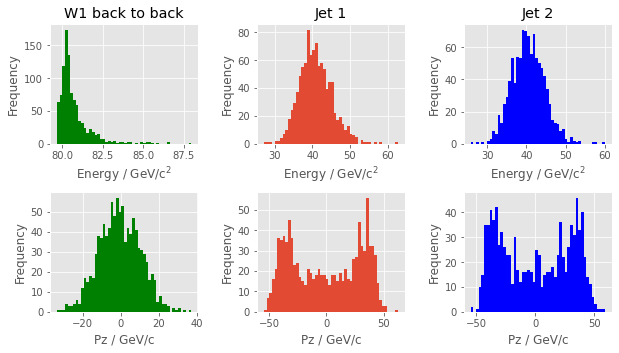

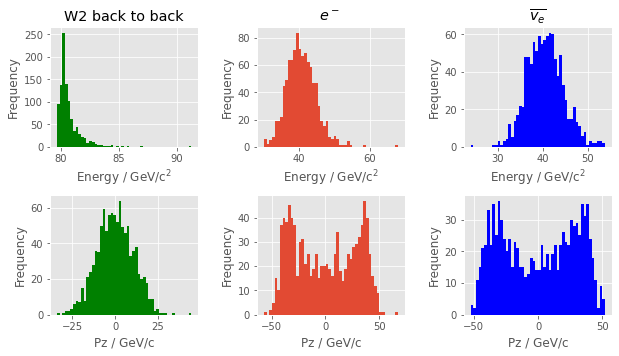

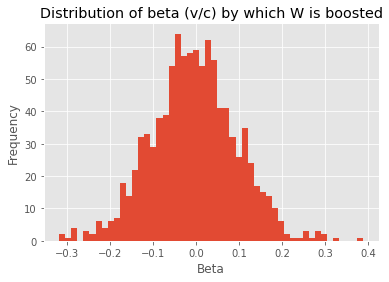

In [22]:
#W1 ~~~~~~~~~~~~~~
fig, ax = plt.subplots(2,3)
plt.subplots_adjust(left=0.0,bottom=0, right=1.3, top=1, wspace=0.4, hspace=0.4)

ax[0,0].hist(events[:,0,3], 50, color = 'g');
ax[0,1].hist(events[:,2,3], 50);
ax[0,2].hist(events[:,3,3], 50,color ='b');

ax[1,0].hist(events[:,0,2], 50,color = 'g');
ax[1,1].hist(events[:,2,2], 50);
ax[1,2].hist(events[:,3,2], 50,color ='b');

plt.setp(ax[0,:], xlabel='Energy / GeV/c$^2$')
plt.setp(ax[1,:], xlabel='Pz / GeV/c')
plt.setp(ax[:], ylabel='Frequency')
ax[0,0].title.set_text('W1 back to back')
ax[0,1].title.set_text('Jet 1')
ax[0,2].title.set_text('Jet 2')

#W2 ~~~~~~~~~~~~~~
fig, ax = plt.subplots(2,3)
plt.subplots_adjust(left=0.0,bottom=0, right=1.3, top=1, wspace=0.4, hspace=0.4)

ax[0,0].hist(events[:,1,3], 50, color = 'g');
ax[0,1].hist(events[:,4,3], 50);
ax[0,2].hist(events[:,5,3], 50,color ='b');

ax[1,0].hist(events[:,1,2], 50,color = 'g');
ax[1,1].hist(events[:,4,2], 50);
ax[1,2].hist(events[:,5,2], 50,color ='b');

plt.setp(ax[0,:], xlabel='Energy / GeV/c$^2$')
plt.setp(ax[1,:], xlabel='Pz / GeV/c')
plt.setp(ax[:], ylabel='Frequency')
ax[0,0].title.set_text('W2 back to back')
ax[0,1].title.set_text('$e^-$ ')
ax[0,2].title.set_text('$ \overline{v_e} $ ')

plt.figure()
plt.title('Distribution of beta (v/c) by which W is boosted')
plt.xlabel('Beta')
plt.ylabel('Frequency')
plt.hist(beta, 50);